<a href="https://colab.research.google.com/github/TheEPIC-saga/AIML-LABS-IIIT/blob/main/AIML_Module_1_Lab_2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Section 1 - Machine Learning terms and metrics

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=92)

In [ ]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [ ]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [ ]:
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel)
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

In [ ]:
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4207
Number of train samples: 16433
Percent of test data: 20.382751937984494 %


##Experiments with splits

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.50832318311003 %


In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracyN1 = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracyN1*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracyR1 = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracyR1, "%")

Validation accuracy using nearest neighbour algorithm: 34.71278567016677 %
Test accuracy: 35.60732113144759 %
Validation accuracy using random classifier: 15.873996294008647 %


In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 33.349645216540246 %


In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy1 = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 35.60732113144759 %


##Increasing Validation Data

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 30 / 100)

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracyN2 = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracyN2*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.71278567016677 %
Test accuracy: 35.60732113144759 %
Validation accuracy using random classifier: 18.529956763434217 %


In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 35.60732113144759 %


##Decreasing Validation data

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 90 / 100)

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.71278567016677 %
Test accuracy: 35.60732113144759 %
Validation accuracy using random classifier: 17.78875849289685 %


In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 35.60732113144759 %


Questions
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?
Answers
1.In case of nearest neighbour algorithm accuracy of the validation set increases with a decrease in the percentage of validation set.In case of random classifier there is not much difference in the accuracy of validation corresponding to the changes in the percentage of validation set.But lesser the data taken for validation lesser will be the reliability of the validation accuracy estimates.
2.The size of the train and validation set do not affect how we can predict the accuracy on the test set using the validation set at all.
3.I think a 20-25% reseravtion for validation set would be good


<ipython-input-49-08e2e533485d>:4: RuntimeWarning: invalid value encountered in scalar divide
  return correct / len(gtlabel)


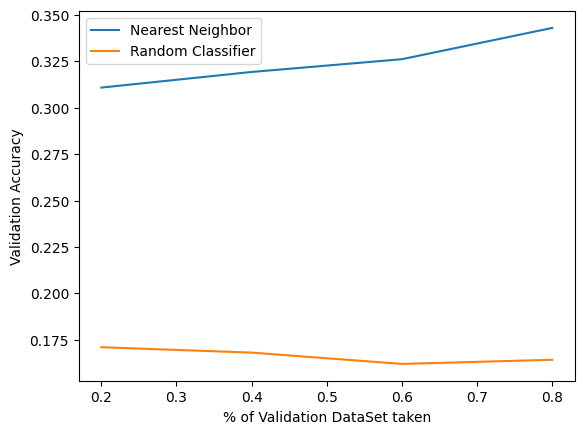

In [ ]:
import matplotlib.pyplot as plt
validation_percentages = [0.2, 0.4, 0.6, 0.8, 1]
nn_accuracies = []
random_accuracies = []

for percentage in validation_percentages:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, percentage)

  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  nn_accuracies.append(valAccuracy)

  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  random_accuracies.append(valAccuracy)

plt.plot(validation_percentages, nn_accuracies, label='Nearest Neighbor')
plt.plot(validation_percentages, random_accuracies, label='Random Classifier')
plt.xlabel('% of Validation DataSet taken')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
def NN3(traindata, trainlabel, testdata):
    """
    3-Nearest Neighbor classifier implementation
    """
    def get_3nn_label(traindata, trainlabel, query):
        diff = traindata - query
        sq = diff * diff
        dist = sq.sum(1)
        # Get indices of 3 nearest neighbors
        nearest_indices = np.argsort(dist)[:3]
        # Return most common label
        return np.bincount(trainlabel[nearest_indices]).argmax()

    predlabel = np.array([get_3nn_label(traindata, trainlabel, i) for i in testdata])
    return predlabel

# Compare 1NN vs 3NN
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75/100)

# 1NN accuracy
pred_1nn = NN(traindata, trainlabel, valdata)
acc_1nn = Accuracy(vallabel, pred_1nn)

# 3NN accuracy
pred_3nn = NN3(traindata, trainlabel, valdata)
acc_3nn = Accuracy(vallabel, pred_3nn)

print(f"1-NN Accuracy: {acc_1nn*100:.2f}%")
print(f"3-NN Accuracy: {acc_3nn*100:.2f}%")

1-NN Accuracy: 34.08%
3-NN Accuracy: 33.23%


Multiple Splits

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.82071200317198 %
Test accuracy: 35.60732113144759 %


Questions

1.Does averaging the validation accuracy across multiple splits give more
consistent results?

2.Does it give more accurate estimate of test accuracy?

3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

Answers

1.Yes, averaging the validation accuracy across multiple splits usually gives more consistent results.

2.Yes, averaging validation accuracy across multiple splits can give a more accurate estimate of test accuracy.

3.With more iterations, the model is tested on a wider variety of data splits. This helps to reduce the impact of any unusual or extreme data points in a single split which gives a more accurate estimate of how well the model performs.

4.Yes, we can deal with a very small train dataset or validation dataset by increasing the iterations.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def compare_knn_classifiers(X, y, splits, iterations):
    results = {
        '1-NN': [],
        '3-NN': []
    }

    for split_size in splits:
        acc_1nn = []
        acc_3nn = []

        for _ in range(iterations):
            X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=split_size)
            knn1 = KNeighborsClassifier(n_neighbors=1)
            knn1.fit(X_train, y_train)
            y_pred_1nn = knn1.predict(X_val)
            acc_1nn.append(accuracy_score(y_val, y_pred_1nn))
            knn3 = KNeighborsClassifier(n_neighbors=3)
            knn3.fit(X_train, y_train)
            y_pred_3nn = knn3.predict(X_val)
            acc_3nn.append(accuracy_score(y_val, y_pred_3nn))
        results['1-NN'].append(np.mean(acc_1nn))
        results['3-NN'].append(np.mean(acc_3nn))

    return results
X = dataset.data
y = dataset.target.astype(int)

# Define split sizes and iterations
split_sizes = [0.6, 0.7, 0.8]  # 60%, 70%, 80% of the data used for training
iterations = 10

results = compare_knn_classifiers(X, y, splits=split_sizes, iterations=iterations)

for split_size, acc_1nn, acc_3nn in zip(split_sizes, results['1-NN'], results['3-NN']):
    print(f"Split size: {split_size*100:.2f}%")
    print(f"1-NN Average Accuracy: {acc_1nn*100:.2f}%")
    print(f"3-NN Average Accuracy: {acc_3nn*100:.2f}%\n")

Split size: 60.00%
1-NN Average Accuracy: 34.29%
3-NN Average Accuracy: 34.32%

Split size: 70.00%
1-NN Average Accuracy: 34.81%
3-NN Average Accuracy: 34.71%

Split size: 80.00%
1-NN Average Accuracy: 35.09%
3-NN Average Accuracy: 35.11%



##Section 2 - Data Augmentation

In [ ]:
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [ ]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalizing the data
train_X = train_X / 255
test_X = test_X / 255

# subsample from images and labels. Otherwise it will take too long!
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [ ]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")

Baseline accuracy without augmentation: 64.72 %


Augmentation 1: Rotation

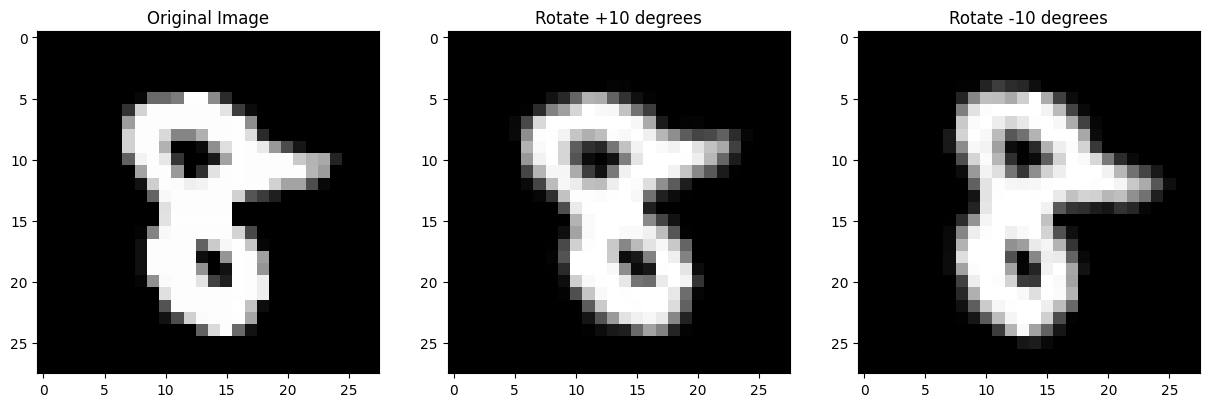

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

plt.show()

In [ ]:
def augRotate(sample, angleconstraint):
    """
    This function takes in a sample and an angle constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint
    """
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

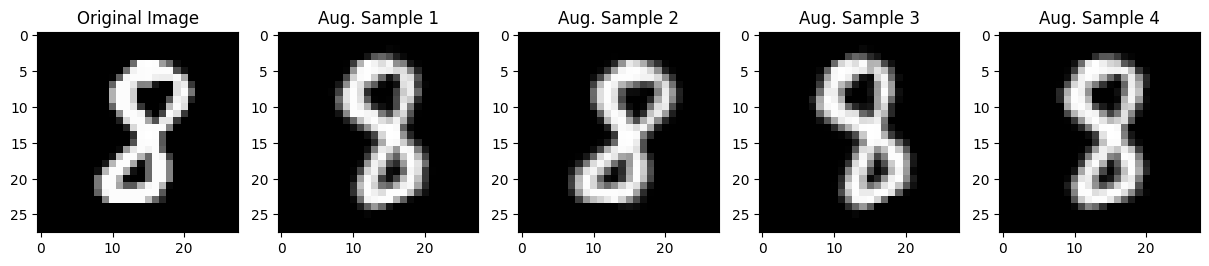

In [ ]:
sample = train_X[20]
angleconstraint = 70

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

plt.show()

In [ ]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X  # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )  # concatenate the augmented data to the set
    auglabel = np.concatenate(
        (auglabel, train_y)
    )  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 67.66 %


In [ ]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # the values we want to test
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)  # we will save the values here

for ii in range(len(angleconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 66.79 %
Accuracy after rotation augmentation constrained by 20 degrees is 67.84 %
Accuracy after rotation augmentation constrained by 30 degrees is 68.47 %
Accuracy after rotation augmentation constrained by 40 degrees is 67.63 %
Accuracy after rotation augmentation constrained by 50 degrees is 67.65 %
Accuracy after rotation augmentation constrained by 60 degrees is 65.3 %
Accuracy after rotation augmentation constrained by 70 degrees is 66.06 %
Accuracy after rotation augmentation constrained by 80 degrees is 64.61 %
Accuracy after rotation augmentation constrained by 90 degrees is 64.31 %


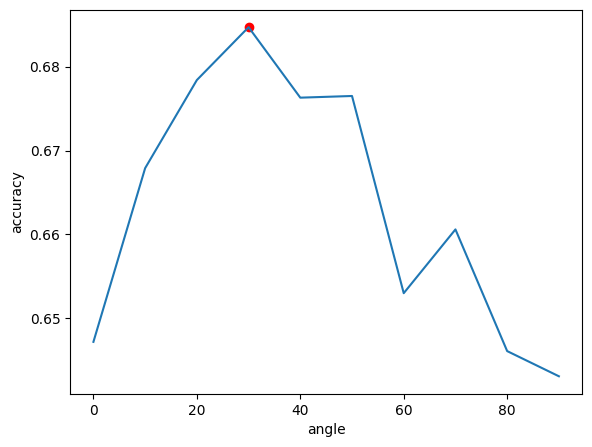

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

Augmentation 2: Shear

In [ ]:
def shear(sample, amount):
    """
    This function takes in a sample and an amount and returns the augmented sample
    by shearing the sample by the given amount

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    amount: the amount by which the sample should be sheared

    returns: the augmented sample which is the input sample sheared by the given amount
    """
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    # Applying shear makes the digit off-center
    # Since all images are centralized, we will do the same here
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

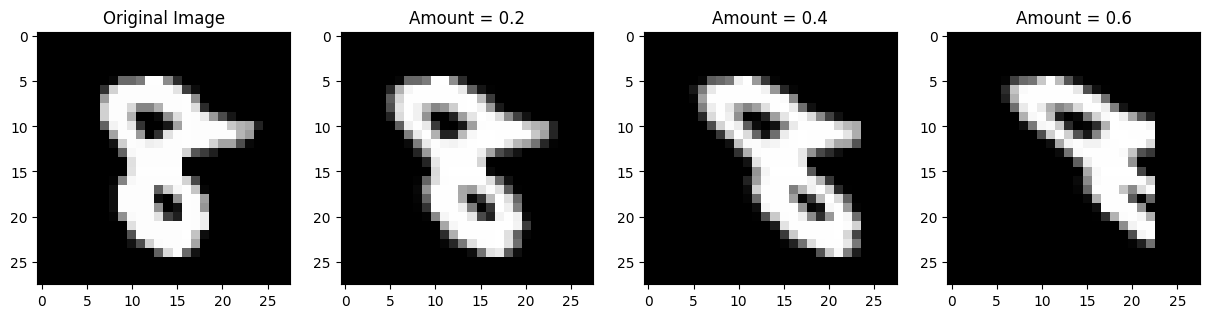

In [ ]:
sample = train_X[2]
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(shear(sample, 0.2), cmap="gray")
axs[1].set_title("Amount = 0.2")

axs[2].imshow(shear(sample, 0.4), cmap="gray")
axs[2].set_title("Amount = 0.4")

axs[3].imshow(shear(sample, 0.6), cmap="gray")
axs[3].set_title("Amount = 0.6")

plt.show()

In [ ]:
def augShear(sample, shearconstraint):
    """
    This function takes in a sample and a shear constraint and returns the augmented sample
    by shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample sheared by a random amount within the shear constraint
    """
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = shear(sample[ii], amt[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

In [ ]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
    1.8,
    2.0,
]  # the values we want to test
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)  # we will save the values here

for ii in range(len(shearconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after shear augmentation constrained by",
        shearconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.2 is 62.79 %
Accuracy after shear augmentation constrained by 0.4 is 64.41 %
Accuracy after shear augmentation constrained by 0.6 is 65.71000000000001 %
Accuracy after shear augmentation constrained by 0.8 is 65.78 %
Accuracy after shear augmentation constrained by 1.0 is 65.42999999999999 %
Accuracy after shear augmentation constrained by 1.2 is 63.6 %
Accuracy after shear augmentation constrained by 1.4 is 63.65 %
Accuracy after shear augmentation constrained by 1.6 is 61.809999999999995 %
Accuracy after shear augmentation constrained by 1.8 is 63.029999999999994 %
Accuracy after shear augmentation constrained by 2.0 is 64.14 %


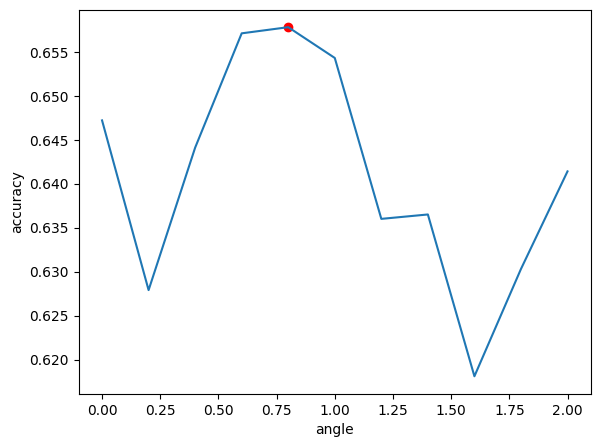

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="red")

Augmentation 3: Rotation + Shear

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    """
    This function takes in a sample, an angle constraint and a shear constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint and shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint and sheared by a random amount within the shear constraint
    """
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )  # first apply shear, then rotate
    return np.squeeze(nsample)  # take care if the input had only one sample.

In [ ]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
]  # the values we want to test
angleconstraints = [0, 10, 20, 30, 40, 50, 60]  # the values we want to test
# cartesian product of both
hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=float)  # we will save the values here

for ii in range(len(hyp)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after augmentation shear:",
        hyp[ii][0],
        "angle:",
        hyp[ii][1],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after augmentation shear: 0.0 angle: 0.0 is 63.32 %
Accuracy after augmentation shear: 0.0 angle: 10.0 is 63.959999999999994 %
Accuracy after augmentation shear: 0.0 angle: 20.0 is 60.64000000000001 %
Accuracy after augmentation shear: 0.0 angle: 30.0 is 63.019999999999996 %
Accuracy after augmentation shear: 0.0 angle: 40.0 is 64.14999999999999 %
Accuracy after augmentation shear: 0.0 angle: 50.0 is 61.72 %
Accuracy after augmentation shear: 0.0 angle: 60.0 is 63.7 %
Accuracy after augmentation shear: 0.2 angle: 0.0 is 63.41 %
Accuracy after augmentation shear: 0.2 angle: 10.0 is 61.25000000000001 %
Accuracy after augmentation shear: 0.2 angle: 20.0 is 60.6 %
Accuracy after augmentation shear: 0.2 angle: 30.0 is 60.07 %
Accuracy after augmentation shear: 0.2 angle: 40.0 is 63.690000000000005 %
Accuracy after augmentation shear: 0.2 angle: 50.0 is 60.12 %
Accuracy after augmentation shear: 0.2 angle: 60.0 is 63.72 %
Accuracy after augmentation shear: 0.4 angle: 0.0 is 63.37000

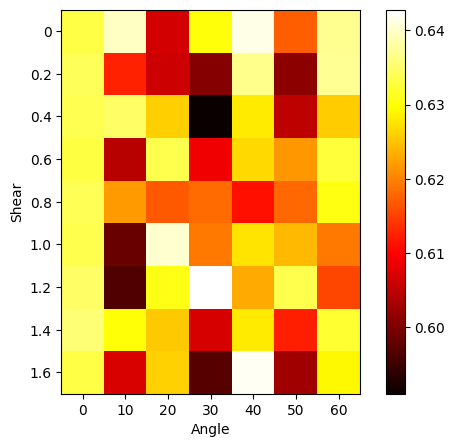

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

Questions

What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
Can you increase the accuracy by increasing the number of augmentations from each sample?
Try implementing a few augmentations of your own and experimenting with them. A good reference is here.
Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?
Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch.

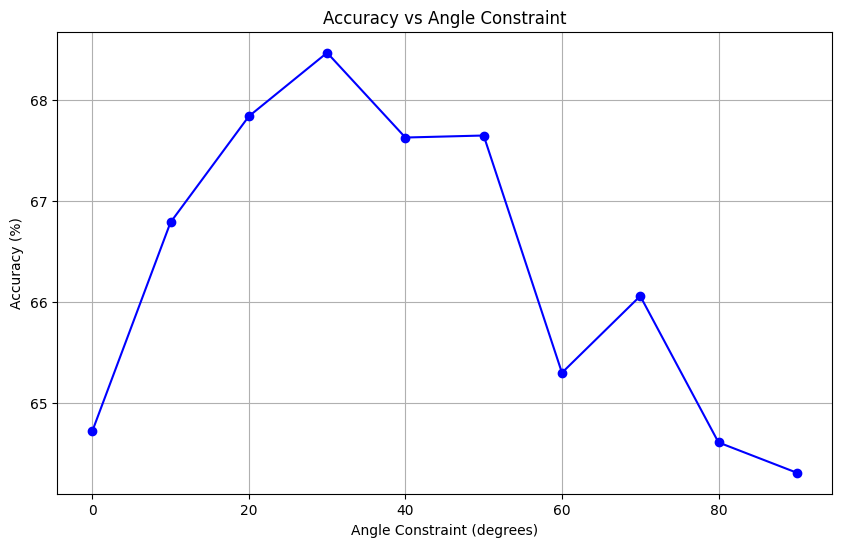

Best angle constraint: 30 degrees
Improvement over baseline: 3.75%


In [ ]:
# From the file results:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
accuracies = [64.72, 66.79, 67.84, 68.47, 67.63, 67.65, 65.3, 66.06, 64.61, 64.31]

# Plot angle constraint results
plt.figure(figsize=(10, 6))
plt.plot(angleconstraints, accuracies, 'bo-')
plt.xlabel('Angle Constraint (degrees)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Angle Constraint')
plt.grid(True)
plt.show()

In [ ]:

# Best angle constraint was 30 degrees with 68.47% accuracy
print(f"Best angle constraint: 30 degrees")
print(f"Improvement over baseline: {68.47 - 64.72:.2f}%")

Best angle constraint: 30 degrees
Improvement over baseline: 3.75%


Exercise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
rng = np.random.default_rng(seed=42)
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X / 255
test_X = test_X / 255

def subset(X, y, num_samples_per_digit=50):
    subset_X = []
    subset_y = []
    for digit in range(10):
        idx = np.where(y == digit)[0]
        chosen_idx = rng.choice(idx, num_samples_per_digit, replace=False)
        subset_X.extend(X[chosen_idx])
        subset_y.extend(y[chosen_idx])
    return np.array(subset_X), np.array(subset_y)

train_X_subset, train_y_subset = subset(train_X, train_y, num_samples_per_digit=50)

def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def Accuracy(gtlabel, predlabel):
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)
testpred = NN(train_X_subset, train_y_subset, test_X)
print("Test accuracy when 50 images are taken for each digit:", Accuracy(test_y, testpred) * 100, "%")

Test accuracy when 50 images are taken for each digit: 85.81 %


#Section 3 - Transforming data using linear algebra

Module 1, Lab 3

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

## Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra [resources](https://www.khanacademy.org/math/linear-algebra/matrix-transformations).

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

$$\begin{equation}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\} = a\left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} + b\left\{  \begin{aligned}0 \\ 1 \end{aligned} \right\} = a\hat{i} + b\hat{j}
\end{equation}$$

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors $\hat{i}$ and $\hat{j}$ are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation}
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1.


Let us see this in action:


In [ ]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 0], [-2, 1]])

data1 = np.array([6, 3])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [ 6 -9]
Data in T1 =  [6 3]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

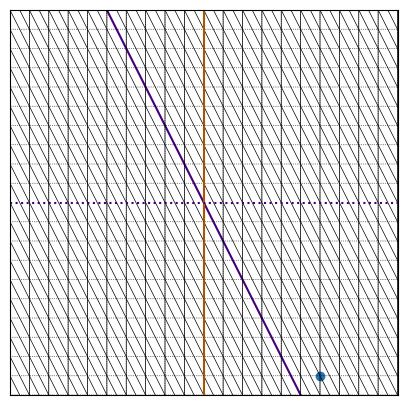

In [ ]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [ ]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[ 6 -9]
[ 6 -9]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [ ]:
# let us define 3 points in T1
A1 = np.array([7, 3])
B1 = np.array([4, 6])
C1 = np.array([-1, 4])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  4.242640687119285
Distance between B and C in T1 =  5.385164807134504
Distance between A and C in T1 =  8.06225774829855

Distance between A and B in T0 =  9.486832980505138
Distance between B and C in T0 =  9.433981132056603
Distance between A and C in T0 =  18.788294228055936


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    """
    This function takes in a binary image and returns the pixels that are holes in the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the holes are filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the convex hull of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the convex hull is filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the boundary of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the boundary is filled in
    """
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [ ]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])
train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

Let us plot the samples and see what they look like:

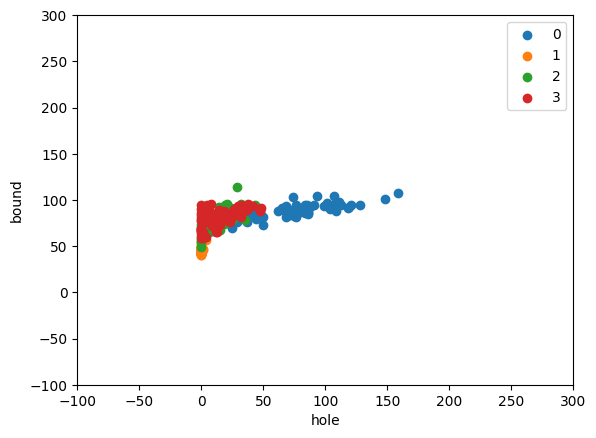

In [ ]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Check the baseline accuracy on the test set:

In [ ]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [ ]:
transform = np.array([[0.7, -0.7], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.7 -0.7]
 [ 0.   2.5]]


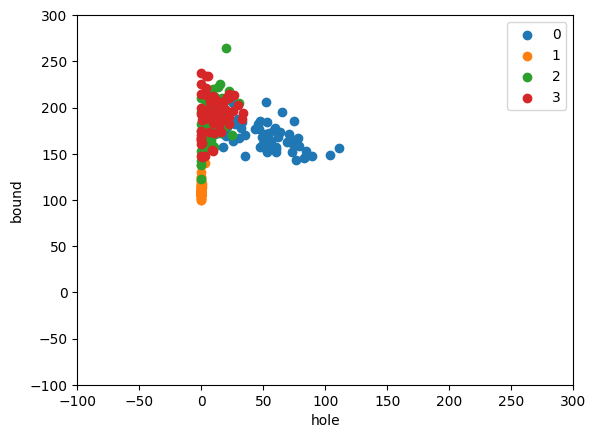

In [ ]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [ ]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 80.95238095238095 % for 4 classes


## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

# Answer 1

In [ ]:
#(i)
transform = np.array([[6,4],[5,6]])
train = np.matmul(train_feats, transform)
test = np.matmul(test_feats, transform)
test_pred = NN(train, train_y, test)
acc = Accuracy(test_y, test_pred)
print('Accuracy = ', acc)

#(ii)
transform = np.array([[0.4,0.7],[0.3,1.6]])
train = np.matmul(train_feats, transform)
test = np.matmul(test_feats, transform)
test_pred = NN(train, train_y, test)
acc = Accuracy(test_y, test_pred)
print('Accuracy = ', acc)

Accuracy =  0.6904761904761905
Accuracy =  0.7857142857142857


# Answer 2
No, the same transform used for these two features will not necessarily work well for other features.

In [ ]:
# Try with a different feature pair (e.g., hole and hull)
train_feats_new = np.vstack((train_hole, train_hull)).transpose()
test_feats_new = np.vstack((test_hole, test_hull)).transpose()

# Apply the same transformation
train_feats_t_new = np.matmul(train_feats_new, transform)
test_feats_t_new = np.matmul(test_feats_new, transform)

# Check accuracy
test_pred_new = NN(train_feats_t_new, train_y, test_feats_t_new)
acc_new = Accuracy(test_y, test_pred_new)
print("Accuracy with new features:", acc_new*100, "%")

Accuracy with new features: 61.904761904761905 %


> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.
Adding all 4 features at once may not be the best strategy.By systematically testing different feature combinations, we can identify which features are most informative for the classification task and potentially improve the model's accuracy beyond what's possible using all features simultaneously.

In [ ]:
features = {
    'hole': (train_hole, test_hole),
    'bound': (train_bound, test_bound),
    'hull': (train_hull, test_hull),
    'sum': (train_sum, test_sum)
}

def normalize_features(train_feats, test_feats):
    # Combine train and test features for consistent scaling
    combined = np.vstack((train_feats, test_feats))

    # Calculate min and max for each feature
    min_vals = combined.min(axis=0)
    max_vals = combined.max(axis=0)

    # Normalize train and test features
    train_normalized = (train_feats - min_vals) / (max_vals - min_vals)
    test_normalized = (test_feats - min_vals) / (max_vals - min_vals)

    return train_normalized, test_normalized

# Function to test feature combinations and return accuracy
def test_combination(feat_names):
    train_feats = np.column_stack([features[feat][0] for feat in feat_names])
    test_feats = np.column_stack([features[feat][1] for feat in feat_names])

    train_norm, test_norm = normalize_features(train_feats, test_feats)
    test_pred = NN(train_norm, train_y, test_norm)
    return Accuracy(test_y, test_pred) * 100

# Test pairs of features
feature_pairs = [('hole', 'bound'), ('hole', 'hull'), ('hole', 'sum'),
                 ('bound', 'hull'), ('bound', 'sum'), ('hull', 'sum')]

for pair in feature_pairs:
    acc = test_combination(pair)
    print(f"Accuracy with {pair[0]} and {pair[1]}: {acc:.2f}%")

# Test all features together
all_train_feats = np.column_stack([features[feat][0] for feat in features])
all_test_feats = np.column_stack([features[feat][1] for feat in features])

all_train_norm, all_test_norm = normalize_features(all_train_feats, all_test_feats)
all_test_pred = NN(all_train_norm, train_y, all_test_norm)
all_acc = Accuracy(test_y, all_test_pred)
print(f"Accuracy with all features: {all_acc:.2f}%")


Accuracy with hole and bound: 80.95%
Accuracy with hole and hull: 64.29%
Accuracy with hole and sum: 64.29%
Accuracy with bound and hull: 76.19%
Accuracy with bound and sum: 64.29%
Accuracy with hull and sum: 69.05%
Accuracy with all features: 0.74%


# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [ ]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [ ]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

Let us plot the rescaled features:

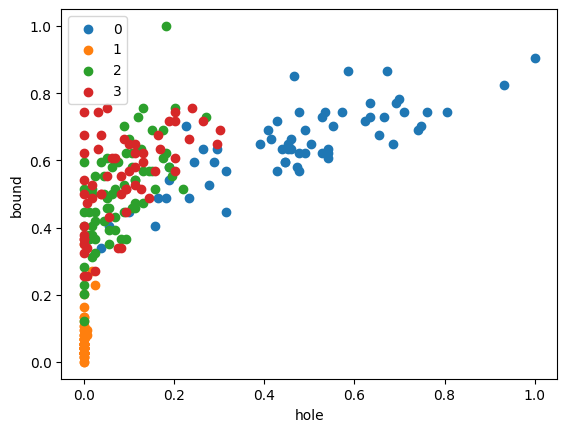

In [ ]:
fig, ax = plotData(train_feats_rescaled, train_y)

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [ ]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned}
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} +
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary.

